# Dithering image to improve appearance of k-means color quantization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from scipy.misc import imread

%matplotlib inline

plt.rcParams['figure.figsize'] = (20., 20.)

In [2]:
#From http://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html
def recreate_image(codebook, labels, w, h):
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

Original image from @kellydelay

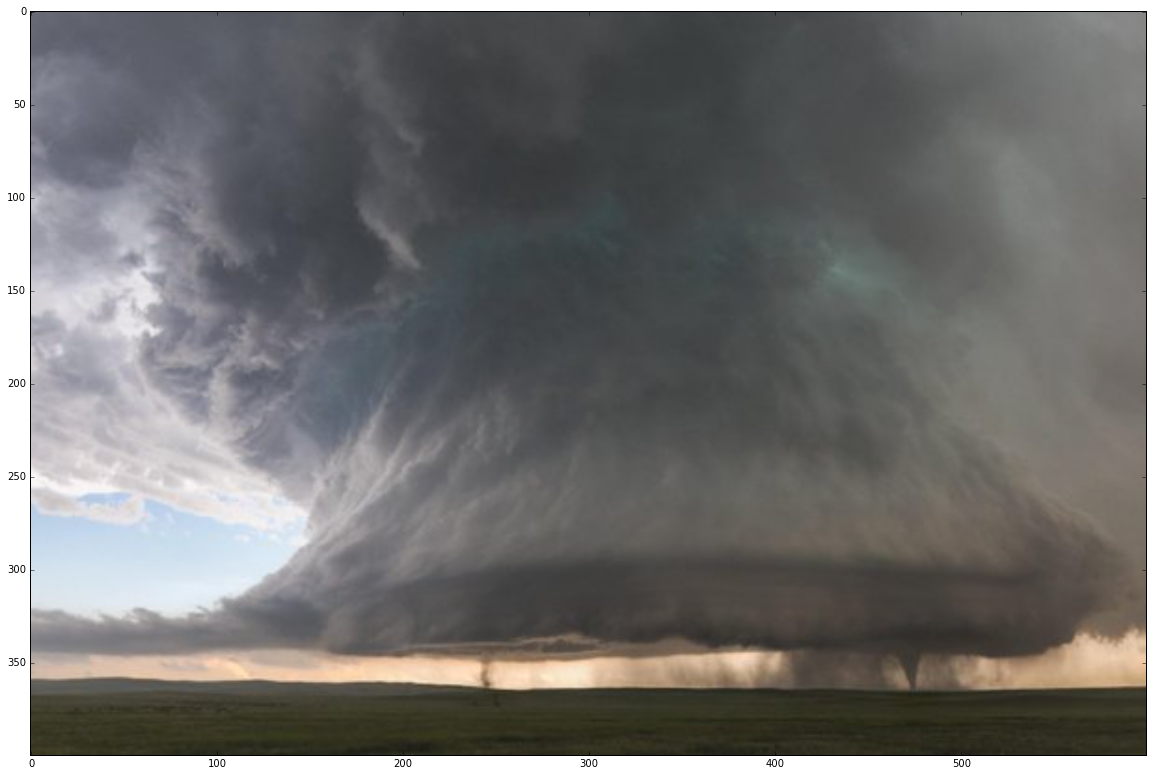

In [3]:
img = imread("./tornado.jpg")
img = np.array(img, dtype=np.float64) / 255

plt.imshow(img)

kmeans color quantization example from
http://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html

If you want to reduce the colors of an image, color quantization can be used to achieve this.

In this case, we use k-means clustering to find the "ideal" color "centers" from which to perform quantization.

Use "n_colors" to adjust how many centers/colors are used for quantization.

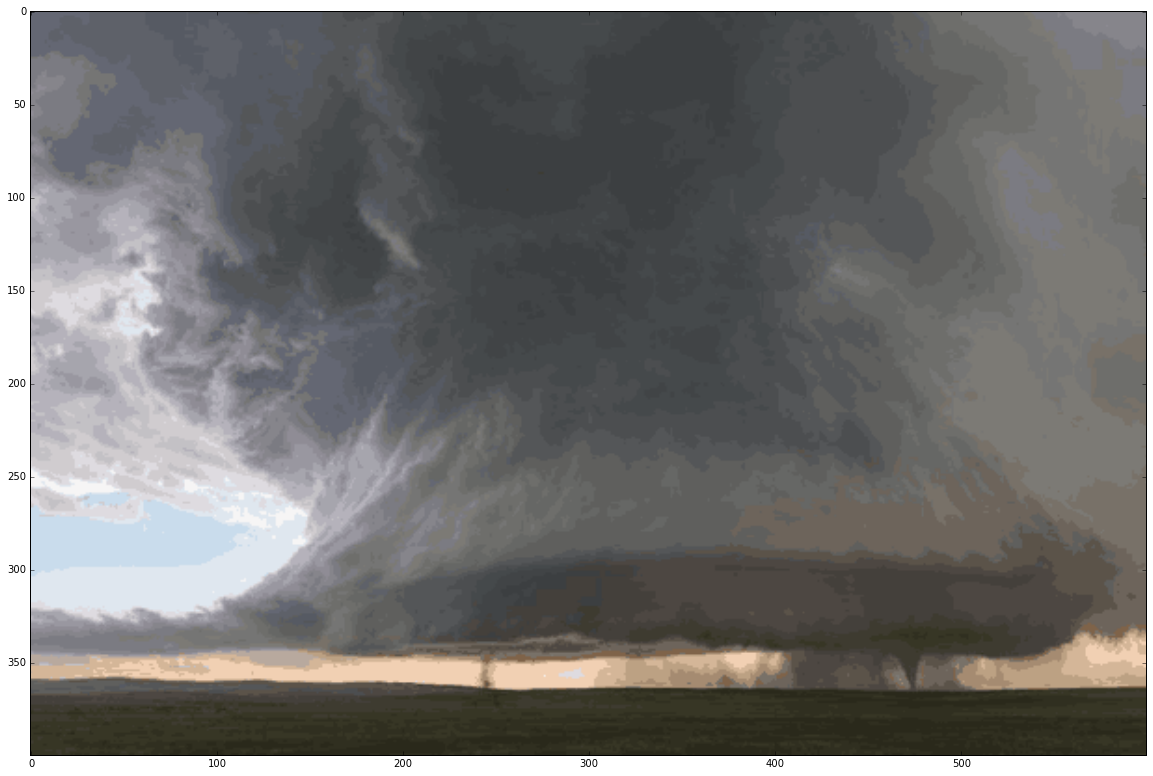

In [5]:
n_colors = 40
w, h, d = tuple(img.shape)
image_array = np.reshape(img, (w * h, d))
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)

quantized_image = recreate_image(kmeans.cluster_centers_, labels, w, h)

plt.imshow(quantized_image)

We notice some sharp changes in colors (see region around x=500, y=100).  This can be made less harsh using dithering.

I used the Floyd-Steinberg approach.. the following is the pure python code.

a is the original image and centers are the k-means centers

In [6]:
def dither_image(a, centers):
    
   ymax = a.shape[0]
   xmax = a.shape[1]
   
   for x in range(xmax):
      for y in range(ymax):
         oldpixel = a[y][x].copy()
         newpixel = centers[np.argmin(np.sum((centers - oldpixel)**2, axis=1))]
         a[y][x] = newpixel
         quant_error = oldpixel - newpixel
         if y+1 < ymax:
             a[y+1][x] = a[y+1][x] + quant_error * 7/16
         if x+1 < xmax:
             a[y][x+1] = a[y][x+1] + quant_error * 5/16
             if y-1 > 0:
                a[y-1][x+1] = a[y-1][x+1] + quant_error * 3/16
             if y+1 < ymax:
                a[y+1][x+1] = a[y+1][x+1] + quant_error * 1/16
   return a

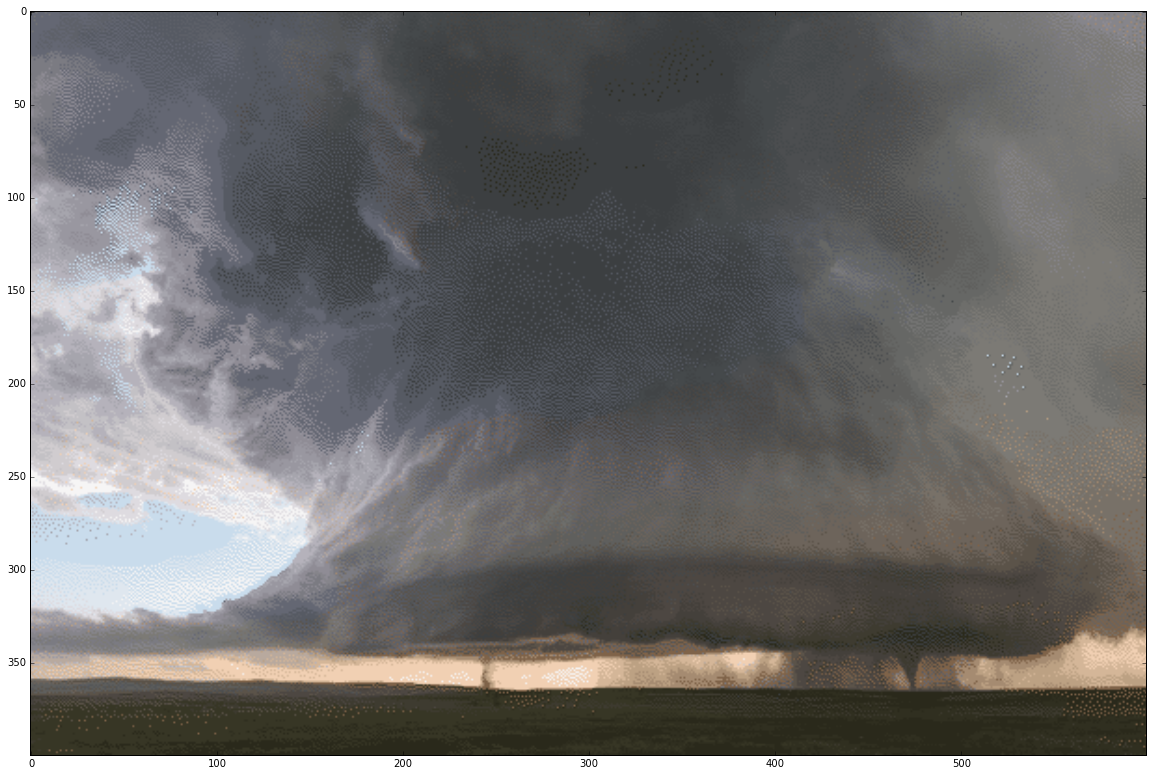

In [7]:
dithered_image = dither_image(np.copy(img), kmeans.cluster_centers_)

plt.imshow(dithered_image)

Try a higher res image.. from Benjamin Jurkovich

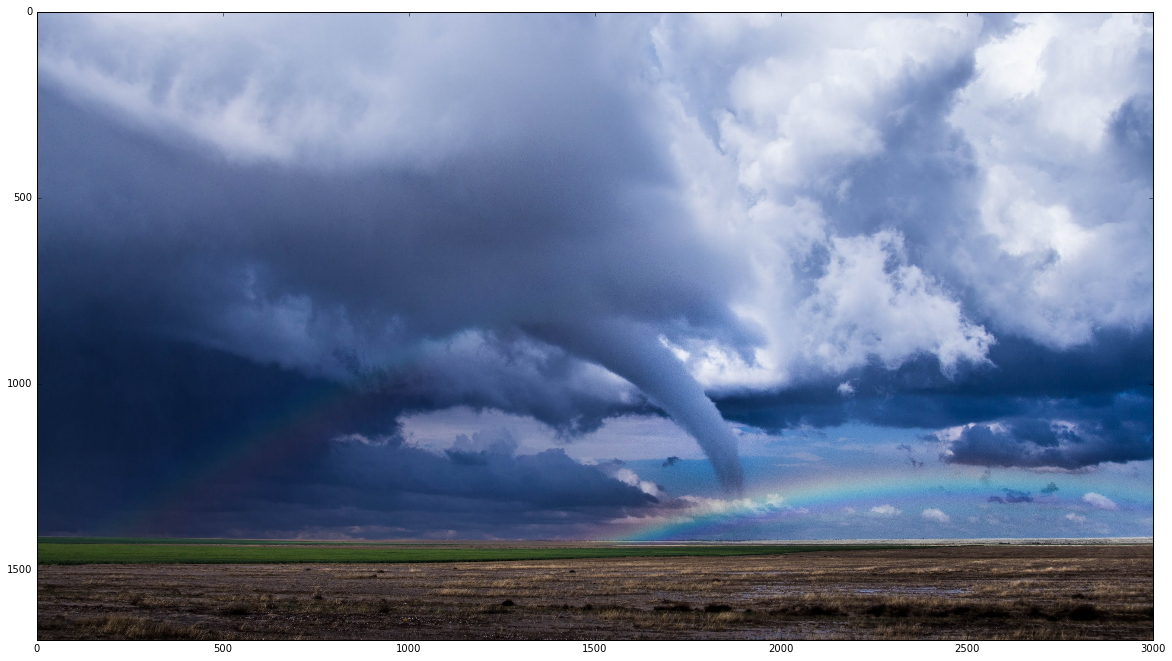

In [26]:
img = imread("./tornado_hires.jpg")
img = np.array(img, dtype=np.float64) / 255

plt.imshow(img)

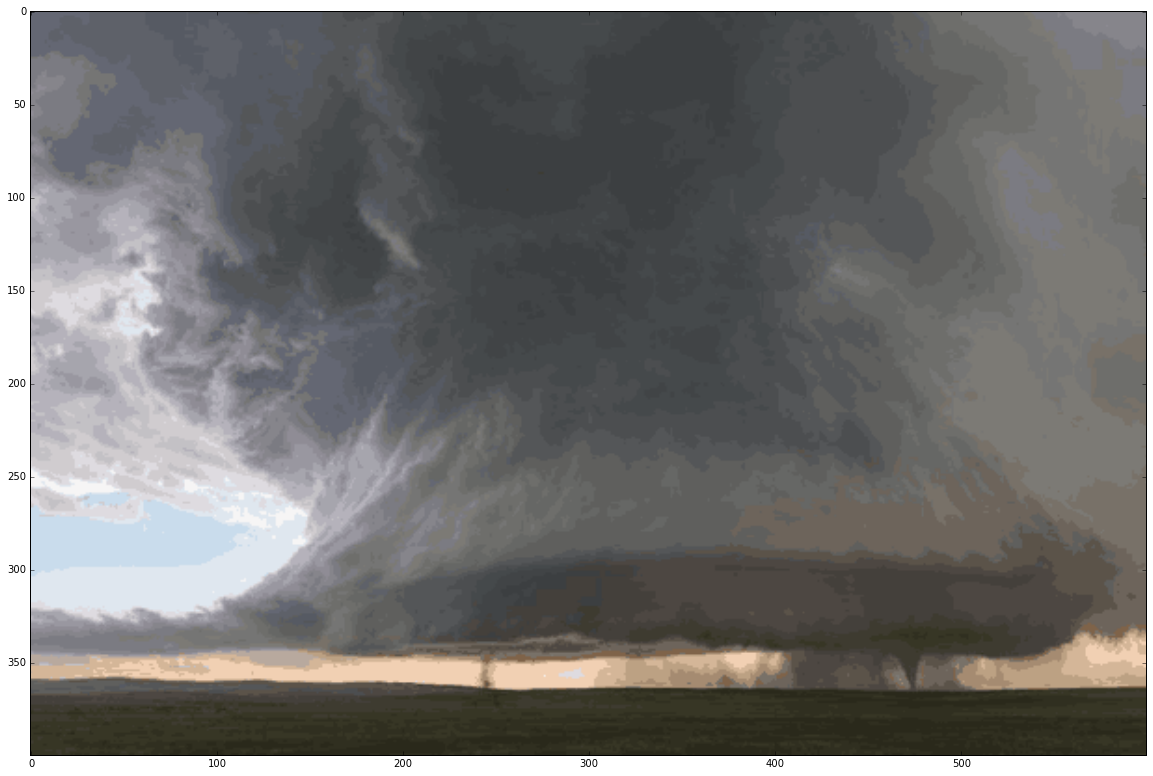

In [8]:
n_colors = 40
w, h, d = tuple(img.shape)
image_array = np.reshape(img, (w * h, d))
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)

quantized_image = recreate_image(kmeans.cluster_centers_, labels, w, h)

plt.imshow(quantized_image)

Apply dithering.. will take several seconds

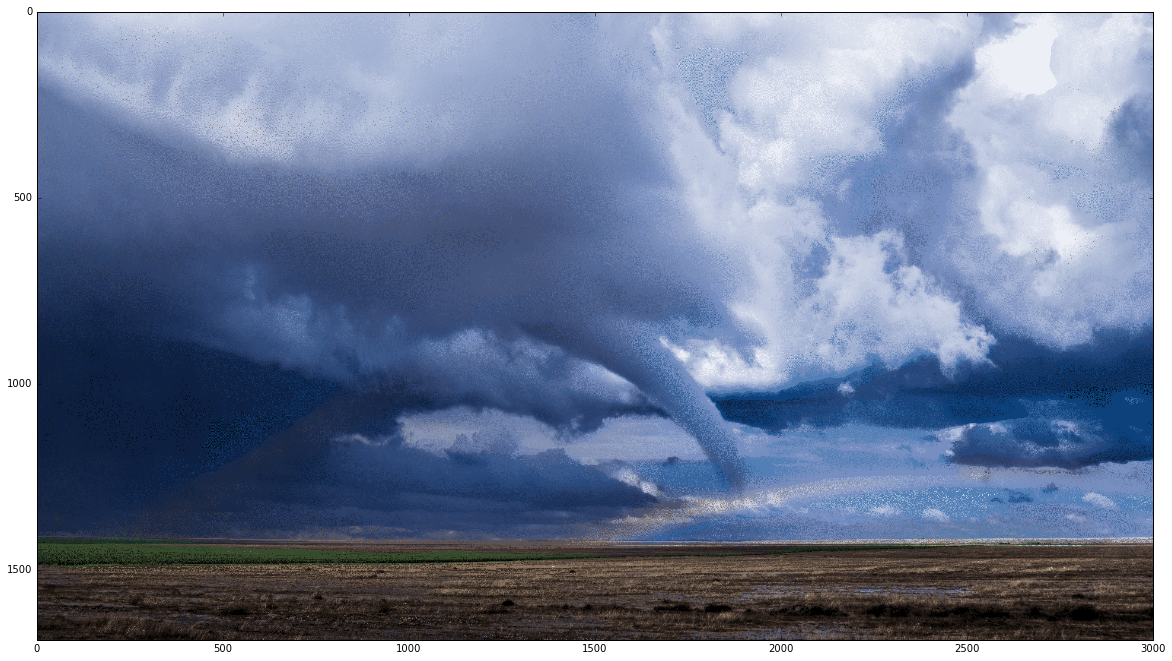

In [28]:
dithered_image = dither_image(np.copy(img), kmeans.cluster_centers_)

plt.imshow(dithered_image)

I'm sorry, there was nothing we could do for the rainbow...